In [9]:
! pip install numpy pandas seaborn nltk neattext scikit-learn

  Using cached scikit_learn-1.5.2-cp39-cp39-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp39-cp39-win_amd64.whl (11.0 MB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
df=pd.read_csv("dataset.csv")

<Axes: xlabel='Emotion', ylabel='count'>

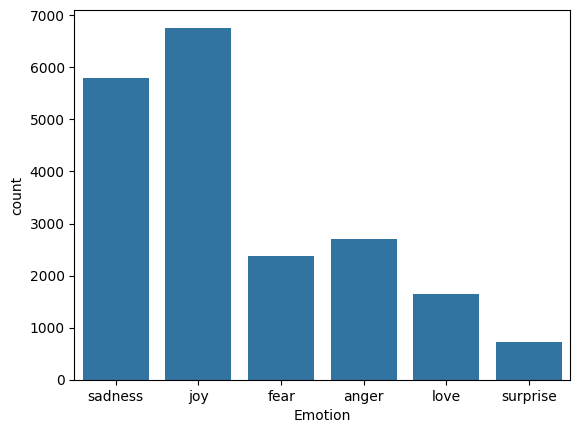

In [4]:
sns.countplot(x='Emotion',data=df)

In [6]:
import neattext as nfx
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles) #removes characters email etc
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords) #removes a,theetc

In [7]:
#x=df['Clean_Text']
x=df['Text']
y=df['Emotion']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
#pipeline:to make training faster
#count vectorizer: given text to vector on basis of count/frequency on each word
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [14]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())]) # simultaniously do 2 tasks
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

d:\uni\text_emotion\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.883

In [15]:
#after training model we must save it so that everytime we dont have to retrain it from scratch
#picke is used
#joblib is used to run multiple tasks parallely nd save the computation and then resume
import joblib
pipeline_file=open("textemotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
#modeldeployment is testing model on real life sitiuation with users
#streamlit is lighweight python library 
#flask micro web framework written in python
#gradio
#fastapi 

